# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


#/////////////////////from previous LeNet-Lab:////////////////////////

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


print("Number of train labels =", y_train.shape)
print("Number of test  labels =", y_test.shape)

#/////////////////////////////////////////////////////////////////////



Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples
Number of train labels = (39209,)
Number of test  labels = (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43 # from : http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset "The training data set contains 39,209 training images in 43 classes". 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0
0
0
0
0


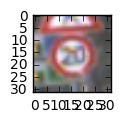

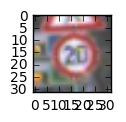

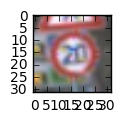

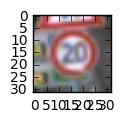

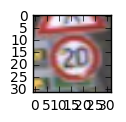

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

#///////////////////from LeNet-Lab///////////////////////
import random
import numpy as np
#////////////////////////////////////////////////////////

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#///////////////////from LeNet-Lab///////////////////////

#index = random.randint(0, len(X_train))
for index in range(0,5):
 image = X_train[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(image)
 print(y_train[index])

#////////////////////////////////////////////////////////




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np

import cv2  #bringing in OpenCV libraries

# 3 preprocessing algorithms are tested for all images in train - test data set. The first is condvert  images to gray
# scale , the  second is convert all data set to YUV space  based on  pre - processing phase in  the article : Traffic Sign Recognition with Multi-Scale Convolutional Networks, Pierre Sermanet,
# Yann LeCun, Courant Institute of Mathematical Sciences, New York University, and finally image data normalization based in 
# lesson of this course 
# for save resul of each pre processing test an array  called X_train_preprocess was created taking into consideration:

# X_train array organization,  X_train[a,b,c,d]  => a number of images = 39209 , 
# b row index of image a , c col index of image a , d index of channel R, G or B

#create 3d array , 1 channel  to gray image pre-process result 
X_train_preprocess=np.zeros((39209, 32,32,1))
#create 3d array , 3 channel  to RGB or YUV image pre-process result 
X_train_preprocess3=np.zeros((39209, 32,32,3))


In [5]:
# Global contrast normalization, this code is available from :
# https://github.com/lisa-lab/pylearn2/blob/master/pylearn2/expr/preprocessing.py
# __author__ = "David Warde-Farley" , __copyright__ = "Copyright 2012, Universite de Montreal", __credits__ = ["David Warde-Farley"]
# __license__ = "3-clause BSD", __email__ = "wardefar@iro" , __maintainer__ = "David Warde-Farley"


def global_contrast_normalize(X, scale=1., subtract_mean=True, use_std=False,sqrt_bias=0., min_divisor=1e-8):
    """
    Global contrast normalizes by (optionally) subtracting the mean
    across features and then normalizes by either the vector norm
    or the standard deviation (across features, for each example).
    Parameters
    ----------
    X : ndarray, 2-dimensional
        Design matrix with examples indexed on the first axis and \
        features indexed on the second.
    scale : float, optional
        Multiply features by this const.
    subtract_mean : bool, optional
        Remove the mean across features/pixels before normalizing. \
        Defaults to `True`.
    use_std : bool, optional
        Normalize by the per-example standard deviation across features \
        instead of the vector norm. Defaults to `False`.
    sqrt_bias : float, optional
        Fudge factor added inside the square root. Defaults to 0.
    min_divisor : float, optional
        If the divisor for an example is less than this value, \
        do not apply it. Defaults to `1e-8`.
    Returns
    -------
    Xp : ndarray, 2-dimensional
        The contrast-normalized features.
    Notes
    -----
    `sqrt_bias` = 10 and `use_std = True` (and defaults for all other
    parameters) corresponds to the preprocessing used in [1].
    References
    ----------
    .. [1] A. Coates, H. Lee and A. Ng. "An Analysis of Single-Layer
       Networks in Unsupervised Feature Learning". AISTATS 14, 2011.
       http://www.stanford.edu/~acoates/papers/coatesleeng_aistats_2011.pdf
    """
    assert X.ndim == 2, "X.ndim must be 2"
    scale = float(scale)
    assert scale >= min_divisor

    # Note: this is per-example mean across pixels, not the
    # per-pixel mean across examples. So it is perfectly fine
    # to subtract this without worrying about whether the current
    # object is the train, valid, or test set.
    mean = X.mean(axis=1)
    if subtract_mean:
        X = X - mean[:, np.newaxis]  # Makes a copy.
    else:
        X = X.copy()

    if use_std:
        # ddof=1 simulates MATLAB's var() behaviour, which is what Adam
        # Coates' code does.
        ddof = 1

        # If we don't do this, X.var will return nan.
        if X.shape[1] == 1:
            ddof = 0

        normalizers = np.sqrt(sqrt_bias + X.var(axis=1, ddof=ddof)) / scale
    else:
        normalizers = np.sqrt(sqrt_bias + (X ** 2).sum(axis=1)) / scale

    # Don't normalize by anything too small.
    normalizers[normalizers < min_divisor] = 1.

    X /= normalizers[:, np.newaxis]  # Does not make a copy.
    return X

Contrast normalization
Number of pre proccessed training examples = 39209
Pre processed Image data shape = (32, 32, 1)


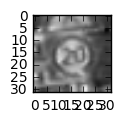

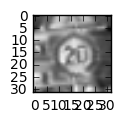

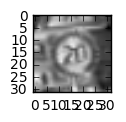

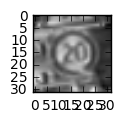

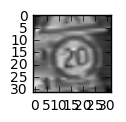

In [6]:
#pre-process all data:

pre_process=2 # select pre process  1= gray scale, 2= global  and local contrast normalization  , 
              #                     3= RGB normalization   

if pre_process == 1:
   print("To gray scale")
   # Pre-process (1): for convert to gray:
   for index in range(0,39209):
       X_train_preprocess[index,:,:,0]=cv2.cvtColor(X_train[index], cv2.COLOR_RGB2GRAY) #grayscale conversion


elif pre_process == 2:
   print ("Contrast normalization")
   # Pre-process (2): for convert to YUV and  apply global  and local contrast normalization 

   #Global contrast normlization

   X_train_preprocess_prev=np.zeros((32,32))
   temparray=np.zeros((39209, 1024)) # 32*32=1024
   temparray_result=np.zeros((39209, 1024))

   for index in range(0,39209):
       X_train_preprocess_prev = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2YUV) #to YUV conversion
       y,u,v = cv2.split(X_train_preprocess_prev ) 
       temparray[index] = y.ravel() # convert 2D to 1D array
        
   temparray_result= global_contrast_normalize(temparray)

   for index in range(0,39209):
       X_train_preprocess[index,:,:,0] =  np.reshape(temparray_result[index], (-1, 32)) # convert 1D to 2D aray 

   #Local contrast normalization 

   for index in range(0,39209):
       X_train_preprocess[index,:,:,0] =  global_contrast_normalize(X_train_preprocess[index,:,:,0])

elif pre_process == 3:
   print ("RGB normalization")
   # Pre-process (3): for normalize  RGB channels in order to apply  the concepts of this course in lesson : 
   # Introduction to Tensorflow , numeral 23: Normalized inputs and initial weights 
   # Rn= (R-128)/128  ,  Gn= (G-128)/128   ,   Bn= (B-128)/128

   for index in range(0,39209):
       b,g,r = cv2.split(X_train[index]) 
       #Normalize rgb channels
       b=(b-128)/128  
       g=(g-128)/128
       r=(r-128)/128
       X_train_preprocess3[index] = cv2.merge([b,g,r])
    
else:
   print ("incorrect value")
   


#pre-process verification:
print("Number of pre proccessed training examples =", len(X_train_preprocess))
print("Pre processed Image data shape =", X_train_preprocess[0].shape)

# pre - process visualization
for index in range(0,5):
 ppimage = X_train_preprocess[index].squeeze()
 #ppimage = X_train_preprocess3[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(ppimage, cmap="gray")
    
#In practice the results of each pre process option for resize train /validation data shows:

# option 1     accuracy = 0.960 (90 train/10 validation) 
# option 2     accuracy = 0.971 (90 train/10 validation)
# option 3     accuracy = 0.900 (90 train/10 validation)

# option 1     accuracy = 0.945 (80 train/20 validation)
# option 2     accuracy = 0.963 (80 train/20 validation)
# option 3     accuracy = 0.881 (80 train/20 validation)

# with LeNet without changes in architecture and params (EPOCHS = 10, BATCH_SIZE = 128, mu = 0, sigma = 0.1)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
3 preprocessing algorithms are tested for all images in train - test data set. The first is convert  images to gray
scale , the  second is convert all data set to YUV space  based on  pre - processing phase in  the article : Traffic Sign Recognition with Multi-Scale Convolutional Networks, Pierre Sermanet,Yann LeCun, Courant Institute of Mathematical Sciences, New York University, and finally image data normalization based in lesson of this course.

In the first oprtion local RGB to GRAY convertion is tested only for comparison purposes,  the second option is tested with the aim of replicating the results in article, here I use an python implementation named global_contrast_normalize. the third option tested apply  the concepts of this course in lesson : Introduction to Tensorflow , numeral 23: Normalized inputs and initial weights for comparison purposes


updated train images shape : (32, 32, 1)
updated train data size : 31367
validation data size : 7842
5
4
35
12
13
31


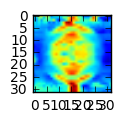

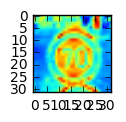

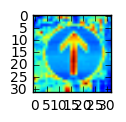

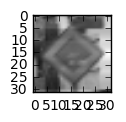

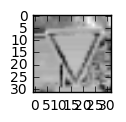

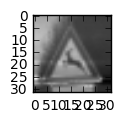

In [7]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split the original train data in   train /validation  


#from lesson tips:

from sklearn.model_selection import train_test_split

if pre_process == 1 or pre_process == 2:
    X_train_resize,X_validation,y_train_resize,y_validation= train_test_split(X_train_preprocess,y_train,test_size=0.2,random_state=0)
elif pre_process == 3:
    X_train_resize,X_validation,y_train_resize,y_validation= train_test_split(X_train_preprocess3,y_train,test_size=0.2,random_state=0)



print("updated train images shape : {}".format(X_train_resize[0].shape))
print("updated train data size : {}".format(len(X_train_resize)))
print("validation data size : {}".format(len(X_validation)))


# transformation visualization
for index in range(0,3):
 ppimage = X_train_resize[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(ppimage)
 print(y_train_resize[index])

for index in range(0,3):
 ppimage =X_validation[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(ppimage, cmap="gray")
 print(y_validation[index])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The validation data set is important for adjust (tuning) the training model and avoid overfitting , the adjust can be done through cross validation to determine among others the number of hidden units and other parameters in the NN architecture. the original  train data set is composed by 39,209 training images in 43 classes and the test dataset contains 12,630 test images. I split the original data train to obtain the validation set. As suggest in article of Sermanet and  LeCun the proportion of test/validation is 25350/1290 =19.65 ; on the other hand in the LeNet classifier this proportion is 55000 /5000 = 11. According to the above the proportion is close to 90%/10% fot train and validation respectively. In order to get a similar proportion the validation set is constructed by extract  10% of the sampes at random , Therefore I resize to  35288 for training,  3921 images for validation and 12,630 images for test. Here is important to note that in the database for class 33 the track 19 only has 29 samples (It may be a mistake in database)

Optional:  Additionally I make a Makeup data to verify the statement: "ConvNets  architectures  have  built-in invariance to small translations, scaling and rotations. When a  dataset  does  not  naturally  contain  those  deformations, adding  them  synthetically  will  yield  more  robust  learning to potential deformations in the test set" found in Sermanet and  LeCun work. 
The makeup data is made from 36629 train images by changing traslation, rotation, scale and brightness randomly with the following ranges:

traslation [ -5 ,  +5 ] pixels
rotation   [-30 , +30 ] degress
scale      [0.8 , 1.3 ] ratio
brightness [  0 , +255 ] intensity
blur       [  1 ,   3 ] pixels

Number of new training examples = 156835
Training labels test= 5.0


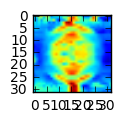

In [8]:
#Generate new data :

# New data is generated from  X_train_resize array by apply randomly traslation, rotation, scale, , brightness and blur 
# transformations at random  number betwen ranges :
#traslation [ -5 ,  +5 ] pixels
#rotation   [-30 , +30 ] degress
#scale      [0.8 , 1.3 ] ratio
#brightness [0 , +255 ] intensity
#blur       [  1 ,   3 ] pixels
# The random operations is applied 5 times for each sample, thus  the new data is an array of 183.145 samples for training 


#create 3d array , 1 channel  new  train data :
num,rows,cols,channels=X_train_resize.shape

X_train_new =np.zeros((num*5,rows,cols,channels))
y_train_new =np.zeros((num*5))

#Dictionary Mapping for Functions (based on : http://stackoverflow.com/questions/11479816/what-is-the-python-equivalent-for-a-case-switch-statement)
def mtranslation(image):
    imageresult=np.zeros((32,32))
    trasx=random.randint(-5,5)
    trasy=random.randint(-5,5)
    rows,cols = image.shape
    T = np.float32([[1,0,trasx],[0,1,trasy]])
    imageresult = cv2.warpAffine(image,T,(cols,rows))
    return imageresult

def mrotation(image):
    imageresult=np.zeros((32,32))
    rot=random.randint(-30,30)
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    R = cv2.getRotationMatrix2D(center, rot, 1.0)
    imageresult = cv2.warpAffine(image, R, (w, h))
    return imageresult

def mscale(image):
    imageresult=np.zeros((32,32))
    scale=round(random.uniform(0.8,1.3),1)
    (h, w) = image.shape[:2]
    scaleimage= cv2.resize(image,None,fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC)
    (h2, w2) = scaleimage.shape[:2]
    offset=int((h-h2)/2)
    x_offset=y_offset=offset
    if offset>=0:
        imageresult[y_offset:y_offset+scaleimage.shape[0], x_offset:x_offset+scaleimage.shape[1]] = scaleimage
    else :
        imageresult = scaleimage[int((h2-h)/2):int(((h2-h)/2)+h), int((w2-w)/2):int(((w2-w)/2)+w)]#[y: y + h, x: x + w]
    return imageresult

def mbrightness(image):
    imageresult=np.zeros((32,32))
    bright=random.randint(0,255)
    imageresult = np.where((255 - image) < bright,255,image+bright) #based on : http://stackoverflow.com/questions/37822375/python-opencv-increasing-image-brightness-without-overflowing-uint8-array
    return imageresult

def mblur(image):
    imageresult=np.zeros((32,32))
    blr=random.randint(1,3)
    imageresult = cv2.blur(image,(blr,blr))
    return imageresult
    

# map the inputs to functions 
options = {0 : mtranslation,
           1 : mrotation,
           2 : mscale,
           3 : mbrightness,
           4 : mblur,}    

               
for i in range(0,len(X_train_resize)): 
    for j in range(0,5):
        X_train_new[i*5+j,:,:,0]=options[random.randint(0,4)](X_train_resize[i,:,:,0])
        y_train_new[i*5+j]=y_train_resize[i] 

print("Number of new training examples =",len(X_train_new))
print("Training labels test=",y_train_new[0])

# transformation visualization
for index in range(0,1):
 ppimage = X_train_new[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(ppimage) #, cmap="gray"


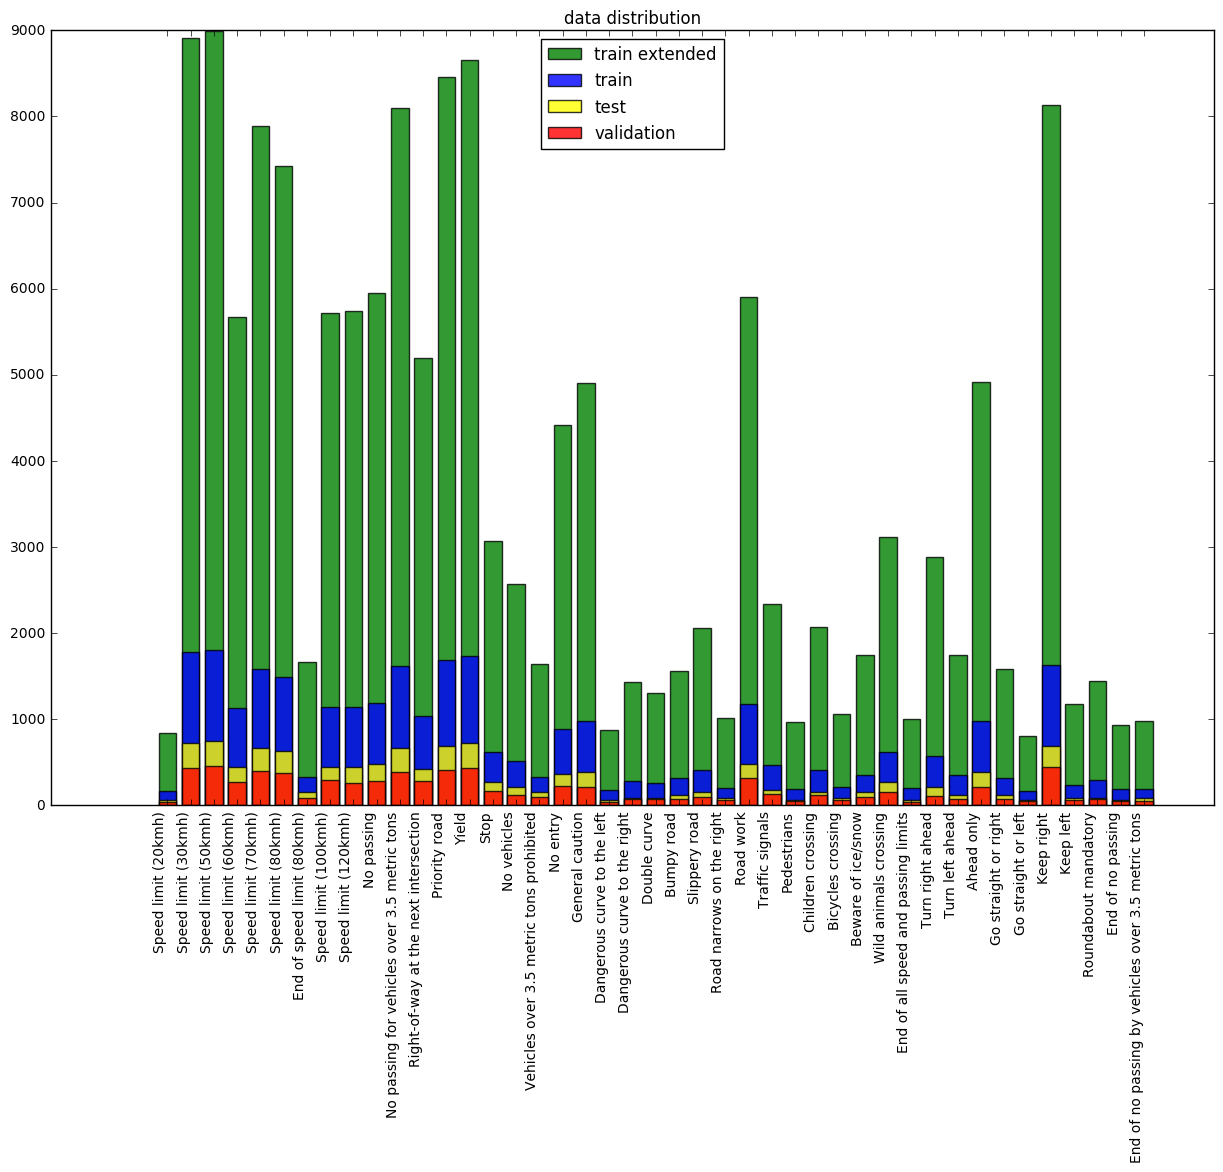

In [39]:
#exploratory visualization on the dataset.
import collections
d_train=collections.Counter(y_train_resize)
d_validation=collections.Counter(y_validation)
d_test=collections.Counter(y_test)
d_trainnew=collections.Counter(y_train_new)

ax_y =np.zeros((43))
ax_dtrain =np.zeros((43))
ax_dval =np.zeros((43))
ax_dtest =np.zeros((43))
ax_dtrainnew =np.zeros((43))
ax_x= ["" for s in range(43)]
count=0
import csv
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      ax_y[count]=row['ClassId']
      ax_x[count]=row['SignName']
      ax_dtrain[count]=d_train[count]
      ax_dval[count]=d_validation[count]
      ax_dtest[count]=d_test[count]
      ax_dtrainnew[count]=d_trainnew[count]
      count+=1 
y_pos = np.arange(0,len(ax_x)*2,2)    
plt.figure(figsize=(15,10), dpi=300)
bar1=plt.bar(y_pos,ax_dtrainnew  ,1.5,align='center', alpha=0.8,label='train extended',color="green")
bar2=plt.bar(y_pos,ax_dtrain     ,1.5,align='center', alpha=0.8,label='train'         ,color="blue")
bar3=plt.bar(y_pos,ax_dtest      ,1.5,align='center', alpha=0.8,label='test'          ,color="yellow")
bar4=plt.bar(y_pos,ax_dval       ,1.5,align='center', alpha=0.8,label='validation'    ,color="red")
plt.title("data distribution")
plt.xticks(y_pos,ax_x,ha='right',rotation=90)
plt.legend(loc='best')
plt.show()                
                

In [10]:
#Shufle the training dada in accordance with lesson tips:

from sklearn.utils import shuffle

X_train_resize, y_train_resize = shuffle(X_train_resize, y_train_resize)
X_train_new, y_train_new = shuffle(X_train_new, y_train_new)

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

First I use the LeNet-5, convolutional neural network architecture from previous lesson:

### First Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 5x5x16.


**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.


**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Relu activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Relu activation function.


**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### 

Then , I experiment with a second architecture :

### Second Architecture

**Layer 1: Convolutional.** output shape  30x30x5.

**Activation.** Relu activation function.

**Pooling.** output shape 28x28x6.5.

**Layer 2: Convolutional.** output shape 26x26x10.

**Activation.** Relu activation function.

**Pooling.** output shape 24x24x10.

**Layer 3: Convolutional.** output shape  22x22x20.

**Activation.** Relu activation function.

**Pooling.** output shape  20x20x20.

**Layer 4: Convolutional.** output shape  18x18x40.

**Activation.** Relu activation function.

**Pooling.** output shape 16x16x40.

**Layer 5: Convolutional.** output shape  14x14x80.

**Activation.** Relu activation function.

**Pooling.** output shape 12x12x80.



**Flatten.** Flatten the output shape.



**Layer 6: Fully Connected.** 12x12x80 inputs , 1000 outputs.

**Activation.** Relu activation function.
**Dropout.**  0.75 dropout.

**Layer 7: Fully Connected.** 100 outputs.

**Activation.** Relu activation function.

**Dropout.**  0.75 dropout.


**Layer 8: Fully Connected (Logits).** 43 outputs.

### 



In [12]:

import tensorflow as tf

EPOCHS = 20 #times for data flow through the network
BATCH_SIZE = 64 # train images at a time

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.5
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    if pre_process == 1 or pre_process == 2:
        #shape=(5, 5, 1, 6)= (height, width, input_depth, output_depth)
       conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    elif pre_process == 3:
       conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    #strides=[1, 1, 1, 1] = (batch, height, width, depth)
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


#########################################################################################################

def LeNetModified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout = 0.75 # Dropout, probability to keep units
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x5.
    #shape=(5, 5, 1, 6)= (height, width, input_depth, output_depth)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 5), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(5))
    #strides=[1, 1, 1, 1] = (batch, height, width, depth)
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 30x30x5. Output = 28x28x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')

    

    # Layer 2: Convolutional. Output = 26x26x10.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,5,10), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(10))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 26x26x10. Output = 24x24x10.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    

    
    # Layer 3: Convolutional. Output = 22x22x20
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,10,20), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(20))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 22x22x20. Output = 20x20x20.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')


    
    # Layer 4: Convolutional. Output = 18x18x40
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3,3,20,40), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(40))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # Activation
    conv4 = tf.nn.relu(conv4)

    # Pooling. Input = 18x18x40. Output = 16x16x40.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    
    # Layer 5: Convolutional. Output = 14x14x80
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3,3,40,80), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(80))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # Activation
    conv5 = tf.nn.relu(conv5)

    # Pooling. Input = 14x14x80. Output = 12x12x80.
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    
        

    #Flatten. Input = 12x12x80.Output = 11520.
    fc0   = flatten(conv5)
    
    #Layer 6: Fully Connected. Input = 11520. Output = 3000.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(11520, 3000), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(3000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    #Layer 7: Fully Connected. Input = 3000. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(3000, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Apply Dropout
    fc2 = tf.nn.dropout(fc2, dropout)
    
    
    # Layer 8: Fully Connected. Input = 100. Output = 43.
    fc5_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc5_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc5_W) + fc5_b

    return logits

In [14]:
# compute output and filter sizes

import math
in_height=24
in_width=24
filter_height=5
filter_width =5
strides = [1, 1, 1, 1]

out_height = math.ceil(float(in_height - filter_height + 1) / float(strides[1]))
out_width  = math.ceil(float(in_width - filter_width + 1) / float(strides[2]))

out_height , out_width

(20, 20)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  First I work with LeNet architecture from the previous lesson, here I define the type of model  as a convolutional neural network with an  a general architecture of three  layer groups:

1) 2 convolutional layers ( image > convolution > max pooling > convolution > max pooling >)
2) 2 fully connected layers  ( > fully connected > fully connected > )
3) 1 classifier layer ( > classifier)
 
As a input I have a one dimentional feature map (one channel images), the  total number of parameters equal to 32x32x43+43 = 44075  (for 32x32 pixel input images  and 43 classes) , the activation functions is defined by a Rectified Linear Units (RELUs), the model size is based on 

Volume of next layer   Vnl=(W−F+2P)/S+1 
or 
new_height = ((Wheight - Fheight + 2 * Pheight)/Sheight) + 1
new_width = ((Wwidth - Fwidth + 2 * Pwidth)/Swidth) + 1

where :

W= input layer volume (example 32x32x1)
F= filter volume =height * width * depth (example 5x5x6)
S= stride   1
P= padding  1

the connectivity applies the above formula and his tensorflow implementation, thus:

out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))


parameters in convolutional layer(without parameter sharing)= (F+1)* Vnl

parameters in convolutional layer(witho parameter sharing)= (F+1)* Vnldepth



then a second architecture is tested by add extra layers in the convolutional group to make the model deeper,   I take into account few reasons for this:
1) parameter eficiency 
2) hierachical structure from info, in the deeper layer a more complicated structure is extracted (geometric shapes)
3) "Adding additional layers, like the output layer, after an activation function turns the model into a nonlinear function. This nonlinearity allows the network to solve more complex problems" from a previous lesson.

The adition of more convolutional layers extract more detail information from input images and (in theory) more complete complex models of each classes at final layers. The architecture is described by:


1)  5 convolutional layers ( image > convolution > max pooling > convolution > max pooling > convolution >    max pooling > convolution > max pooling > convolution > max pooling >)
2)  2 fully connected layers  ( > fully connected > dropout > fully connected > dropout )
3)  1 classifier layer ( > classifier)

The filter depth (amount of filters in a convolutional layer) are progressively increased from 5 to 80 in the final convolutional layer  and the size of the output is decreased by max pooling layers (works well than average pooling in this case), a dropout (for robustness and prevent overfitting) regularization method is aplied in fully connected layers 
 

In [15]:
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
if pre_process == 1 or pre_process == 2:
 x = tf.placeholder(tf.float32, (None, 32, 32,1))
elif pre_process == 3:
 x = tf.placeholder(tf.float32, (None, 32, 32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.

#Training Pipeline:

rate = 0.001

#logits = LeNet(x)
logits = LeNetModified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [17]:
#Evaluation  Pipeline:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

#Train model

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_resize)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_resize, y_train_resize = shuffle(X_train_resize, y_train_resize)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_resize[offset:end], y_train_resize[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

In [18]:
#Train model with new data

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_new)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_new, y_train_new = shuffle(X_train_new, y_train_new)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_new[offset:end], y_train_new[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenetmodified')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.948

EPOCH 2 ...
Validation Accuracy = 0.978

EPOCH 3 ...
Validation Accuracy = 0.957

EPOCH 4 ...
Validation Accuracy = 0.976

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.988

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.991

EPOCH 11 ...
Validation Accuracy = 0.988

EPOCH 12 ...
Validation Accuracy = 0.990

EPOCH 13 ...
Validation Accuracy = 0.986

EPOCH 14 ...
Validation Accuracy = 0.989

EPOCH 15 ...
Validation Accuracy = 0.989

EPOCH 16 ...
Validation Accuracy = 0.989

EPOCH 17 ...
Validation Accuracy = 0.987

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.990

EPOCH 20 ...
Validation Accuracy = 0.990

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

For the above  two architectures  I use the same train parameters, that is:

80% train / 20% evaluation

hyperparameters: mu = 0  , sigma = 0.1

optimizer: AdamOptimizer

batch size: 128

epochs: 10

training rate: 0.001

The results with this params I got as a result:

Architecture 1 LeNet: at epoch 10 ,  Validation Accuracy = 0.963 ,  with aditional data , Validation Accuracy = 0.973

Architecture 2 LeNetModified: at epoch 10 ,  Validation Accuracy = 0.982 ,  with aditional data , Validation Accuracy = 0.988


Then the parameters were modified as follows:

80% train / 20% evaluation

hyperparameters: mu = 0  , sigma = 0.5

optimizer: AdamOptimizer

batch size: 64

epochs: 20

training rate: 0.001

The results with this params I got as a result:

Architecture 1 LeNet: at epoch 20 ,  Validation Accuracy = 0.978 ,  with aditional data , Validation Accuracy = 0.985

Architecture 2 LeNetModified: at epoch 20 ,  Validation Accuracy = 0.983 ,  with aditional data , Validation Accuracy = 0.99




Evaluate the Model

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.


In [19]:
   #pre process test data 
   X_test_preprocess=np.zeros((12630, 32,32,1)) 

   for index in range(0,12630):
       X_test_preprocess[index,:,:,0] =  global_contrast_normalize(X_test[index,:,:,0])

In [20]:
with tf.Session() as sess:
    saver.restore(sess, './lenetmodified')

    test_accuracy = evaluate(X_test_preprocess, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.864


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The approach adopted was an implementation of the leNet architecture as well as a modification to it increasing the number of convolutional layers as well as a process of test and error in the change of the network parameters to obtain an accuracy close to 99.17% , this value was taken as the basis of the previous LeNet architecture result on the MNIST system as well as in the article "Traffic Sign Recognition with Multi-Scale Convolutional Networks" that uses the same database and from which the Pre processing and a similar test set of 12569 images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/john/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


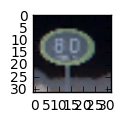

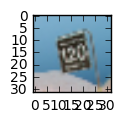

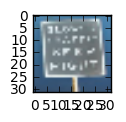

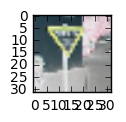

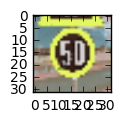

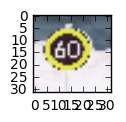

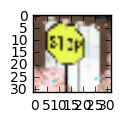

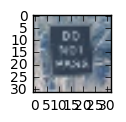

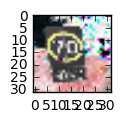

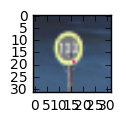

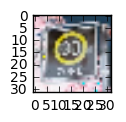

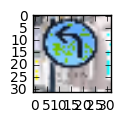

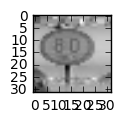

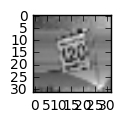

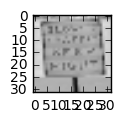

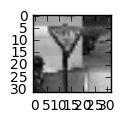

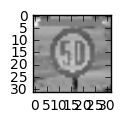

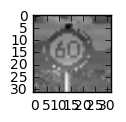

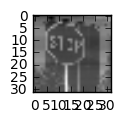

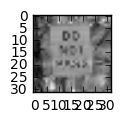

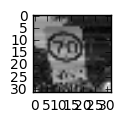

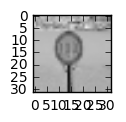

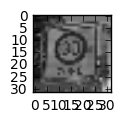

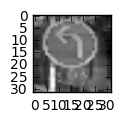

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

X_newdata=np.zeros((12, 32,32,3))
X_newdata_preprocess=np.zeros((12, 32,32,1)) 
y_newdata = np.array([5, 8, 38 , 13 , 2 , 3 , 14 , 9 , 4 , 7 , 1 , 34 ])
counter=0

import cv2
import glob
for img in glob.glob("newdata/roi/*.jpg"):
    newImage = cv2.imread(img) 
    newImageresized = cv2.resize(newImage, (32, 32)) 
    X_newdata[counter]=newImageresized
    plt.figure(figsize=(1,1))
    plt.imshow(X_newdata[counter])
    counter+=1
#pre process test data 

for index in range(0,12):
    X_newdata_preprocess[index,:,:,0] =  global_contrast_normalize(X_newdata[index,:,:,0])
    

for index in range(0,12):
 ppimage =X_newdata_preprocess[index].squeeze()
 plt.figure(figsize=(1,1))
 plt.imshow(ppimage, cmap="gray")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 
I chose 12 images of traffic signs from internet , this images shows street scenes in different conditions of illumination , perspective, image resolution , image quality  that may present difficulties for the classification algorithm, the images. The images were pre processed by changing their size and apply contrast normalization 

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#one by one
#with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    #for index in range(0,12):
      #predictions=sess.run(tf.argmax(logits,1), feed_dict={x: [X_newdata_preprocess[index]]})  
      #print(predictions)
        
#batch

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #predictions_argmax= sess.run(tf.argmax(logits,1), feed_dict={x: X_newdata_preprocess[0:12]})
    predictions_softmax=sess.run(tf.nn.softmax(logits), feed_dict={x: X_newdata_preprocess[0:12]})         
    newdata_accuracy = evaluate(X_newdata_preprocess, y_newdata)
    print("New data Accuracy = {:.3f}".format(newdata_accuracy))

print("argmax probabilities",np.amax(predictions_softmax,axis=1) )
print("argmax probabilities indices",np.argmax(predictions_softmax,axis=1) )
#correct labels are:
#  5, 8, 38 , 13 , 2 , 3 , 14 , 9 , 4 , 7 , 1 , 34 

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

print("softmax probabilities",predictions_softmax )

New data Accuracy = 0.417
argmax probabilities [ 0.46089122  0.52224505  0.312823    0.99984729  0.97544754  0.98584914
  0.74789828  0.8089838   0.8321774   0.57943749  0.18119644  0.93400133]
argmax probabilities indices [ 8  7 13 18  2  3 14  8  8 14  3 40]
softmax probabilities [[  9.69588105e-03   1.03860144e-02   1.53120253e-02   3.71025465e-02
    2.97428686e-02   8.60921592e-02   5.63597586e-03   2.60235406e-02
    4.60891217e-01   3.67883891e-02   2.49218289e-03   1.81185349e-03
    2.14694329e-02   7.36557553e-03   1.60635948e-01   1.38748158e-03
    3.39348079e-03   4.06732131e-03   1.65329613e-02   8.60429282e-05
    1.20522815e-03   5.31257065e-05   2.66331423e-04   6.58268866e-04
    8.42459907e-04   7.17740087e-03   1.02093359e-02   6.31225266e-05
    2.18385388e-03   5.41682297e-04   1.46557600e-03   1.84021587e-03
    2.01631850e-03   5.02301729e-04   8.95120960e-04   9.12867300e-03
    7.36173708e-04   1.27163923e-06   2.17935909e-02   3.56086930e-05
    9.83351143e-0

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  
As shown in the above results, the accuracy of the algorithm is worst in comparison with the images in the training / evaluation / test set, hence the importance of having sufficient variability in training data for the network. Based on the file signnames.csv we compare the results of the accuracy prediction obtaining a maximum value of 0.333 , this is 4 correctly ( 60Kmh, 50Kmh, Stop and turn to left) classified images and 8 misclassified.

In [23]:
# Certainty of its predictions:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Certainty= sess.run(tf.nn.top_k(predictions_softmax,k=5))

Certainty

#correct labels are:
#  5, 8, 38 , 13 , 2 , 3 , 14 , 9 , 4 , 7 , 1 , 34 

TopKV2(values=array([[  4.60891217e-01,   1.60635948e-01,   8.60921592e-02,
          3.71025465e-02,   3.67883891e-02],
       [  5.22245049e-01,   3.83906156e-01,   3.22612450e-02,
          3.13928612e-02,   2.81852260e-02],
       [  3.12822998e-01,   2.42352486e-01,   8.00783411e-02,
          5.58697991e-02,   5.34676500e-02],
       [  9.99847293e-01,   1.51293396e-04,   1.25450197e-06,
          7.55571463e-08,   3.85615273e-08],
       [  9.75447536e-01,   2.45405026e-02,   1.10741103e-05,
          7.29886153e-07,   8.92865231e-08],
       [  9.85849142e-01,   8.53991229e-03,   4.16887971e-03,
          9.57113632e-04,   4.51951812e-04],
       [  7.47898281e-01,   3.40079553e-02,   2.91637648e-02,
          2.88885720e-02,   2.58293487e-02],
       [  8.08983803e-01,   6.20024055e-02,   4.64925244e-02,
          3.25691216e-02,   2.44878866e-02],
       [  8.32177401e-01,   1.38941735e-01,   2.32253540e-02,
          5.57135791e-03,   8.13279112e-05],
       [  5.79437494e-0

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The result of the function tf.nn.top_k was compared to the probability complete table delivered by the  tf.nn.softmax (logits) function as shown above, this allows to observe how uncertain is the result of the algorithm that it looks for if the Correct label appears within the highest given probabilities.

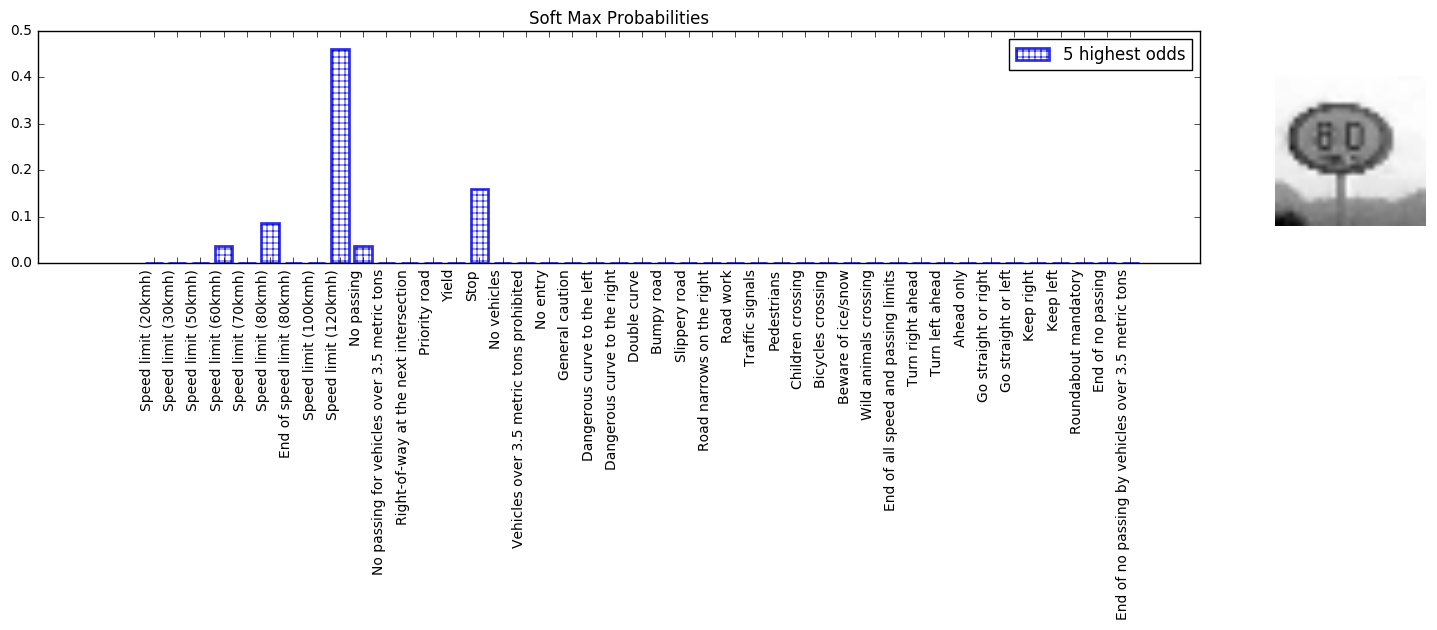

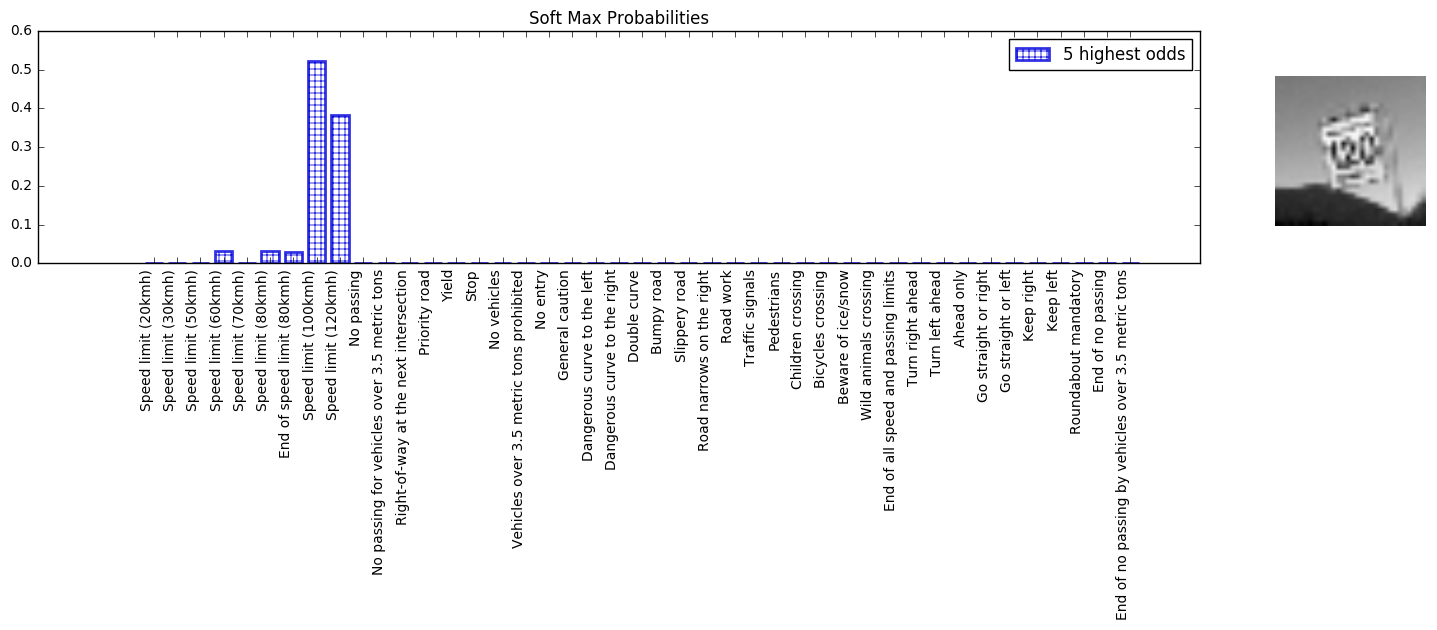

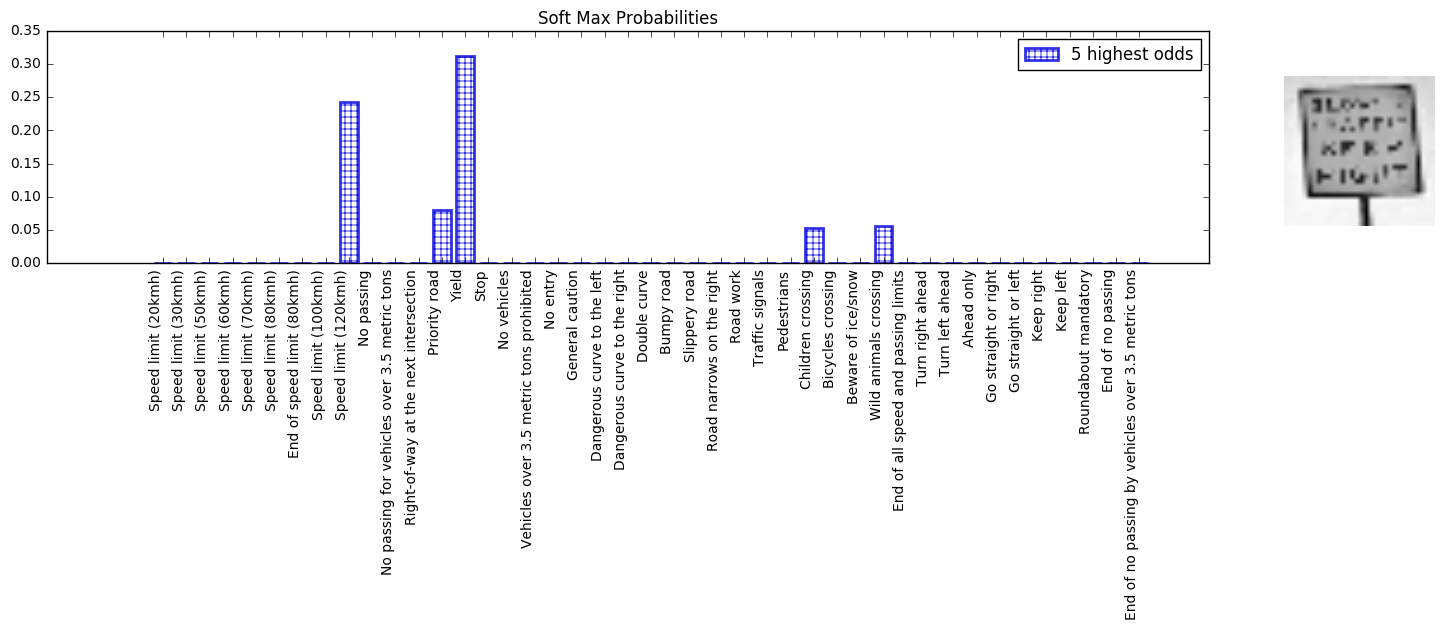

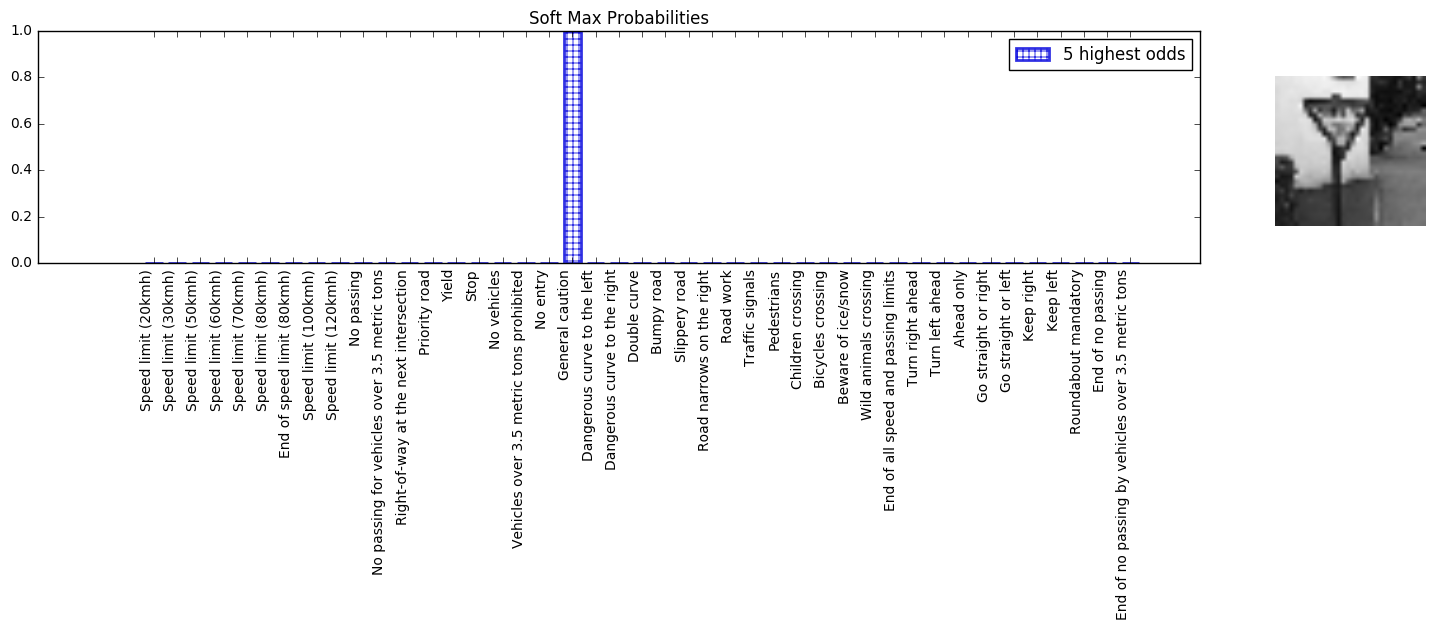

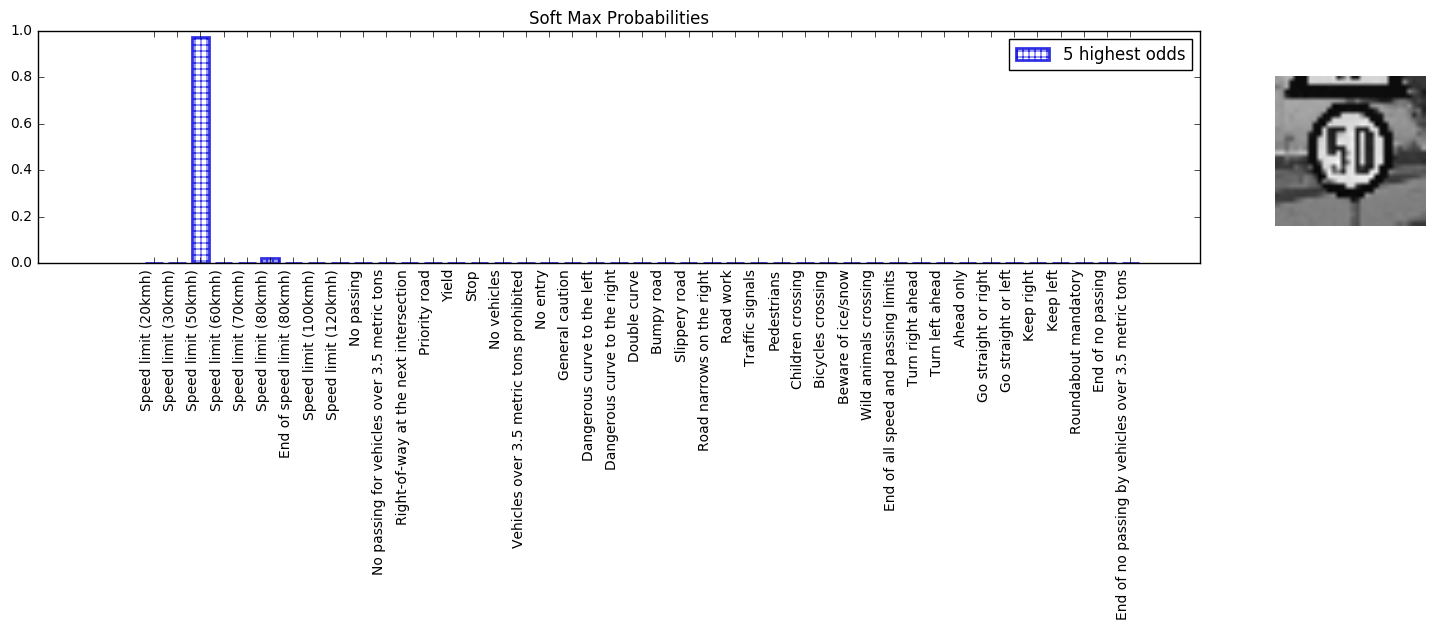

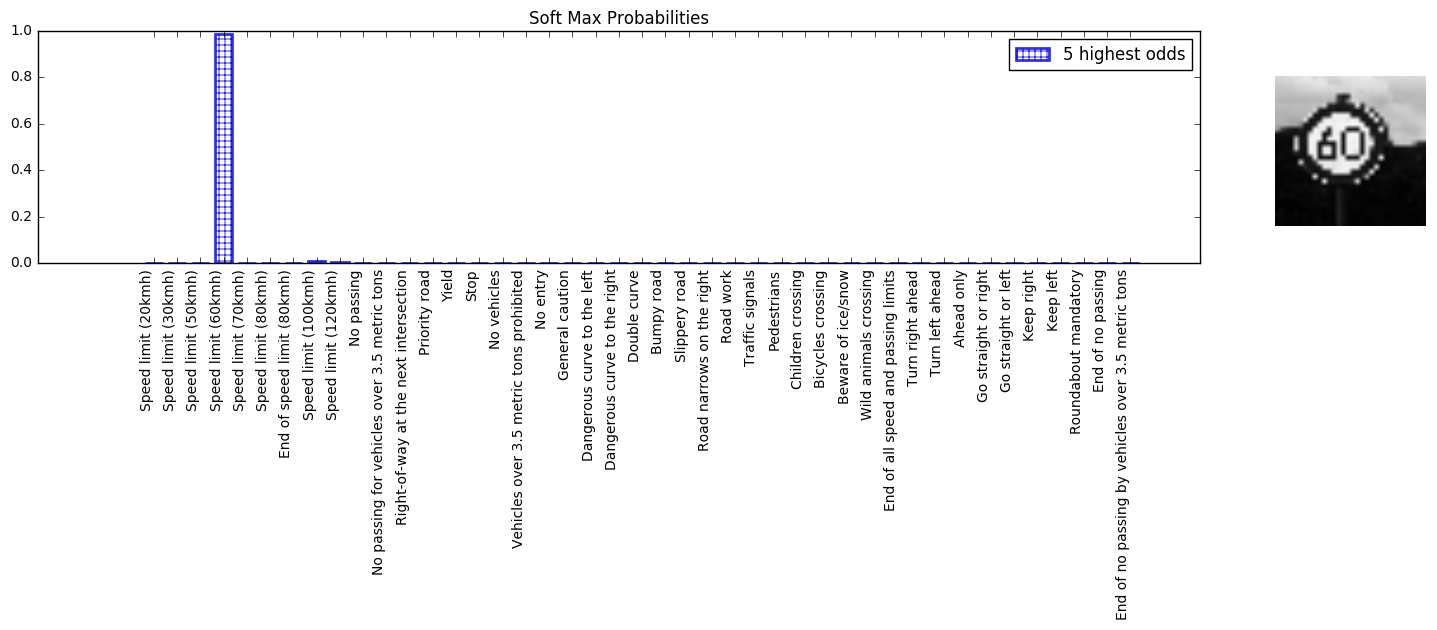

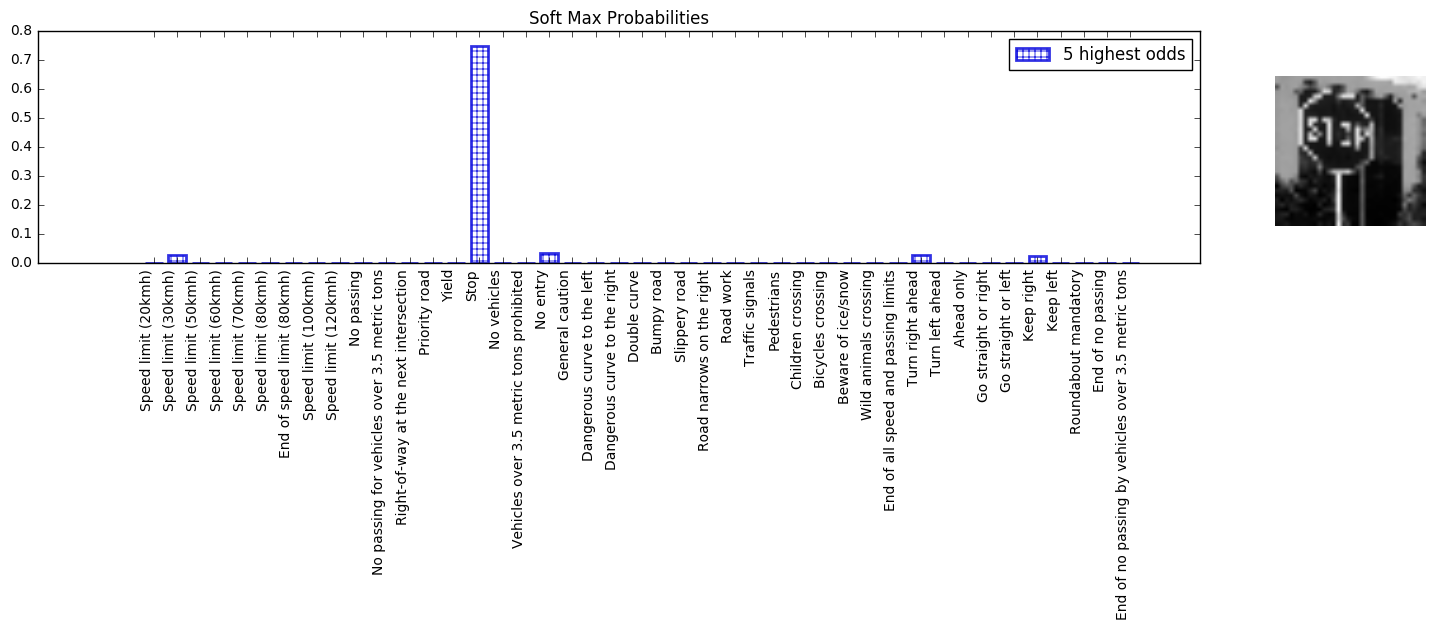

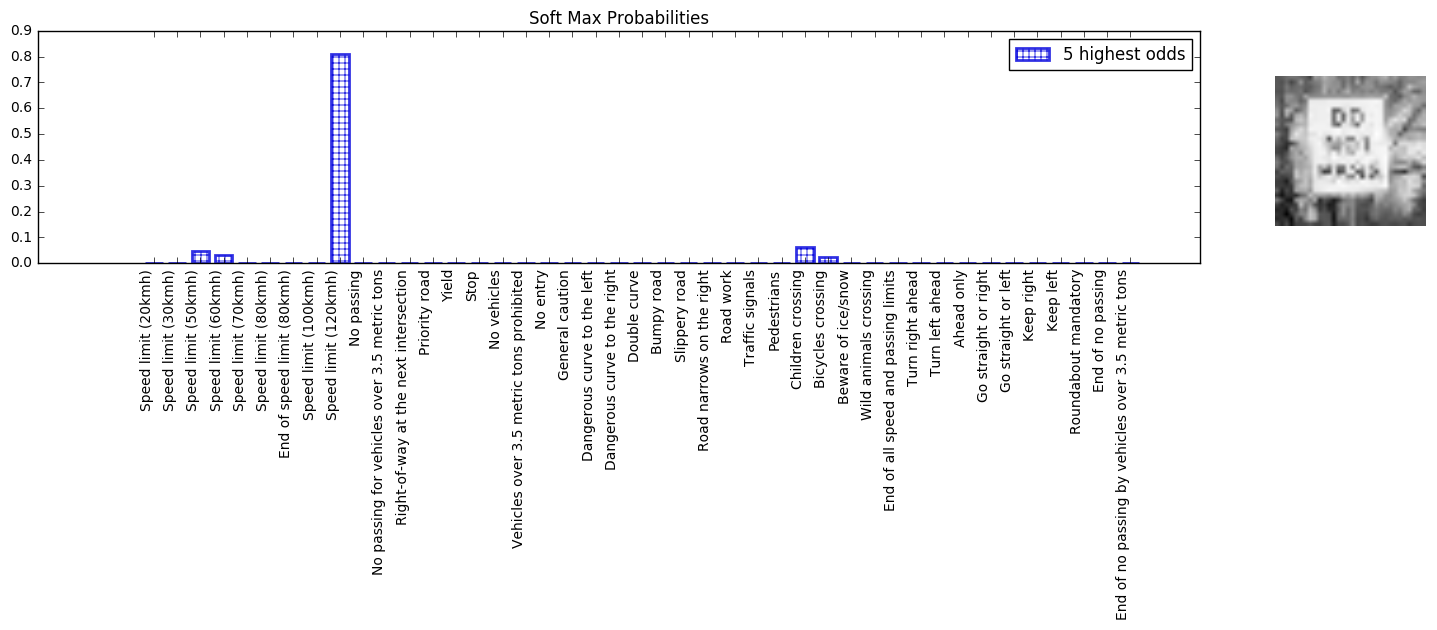

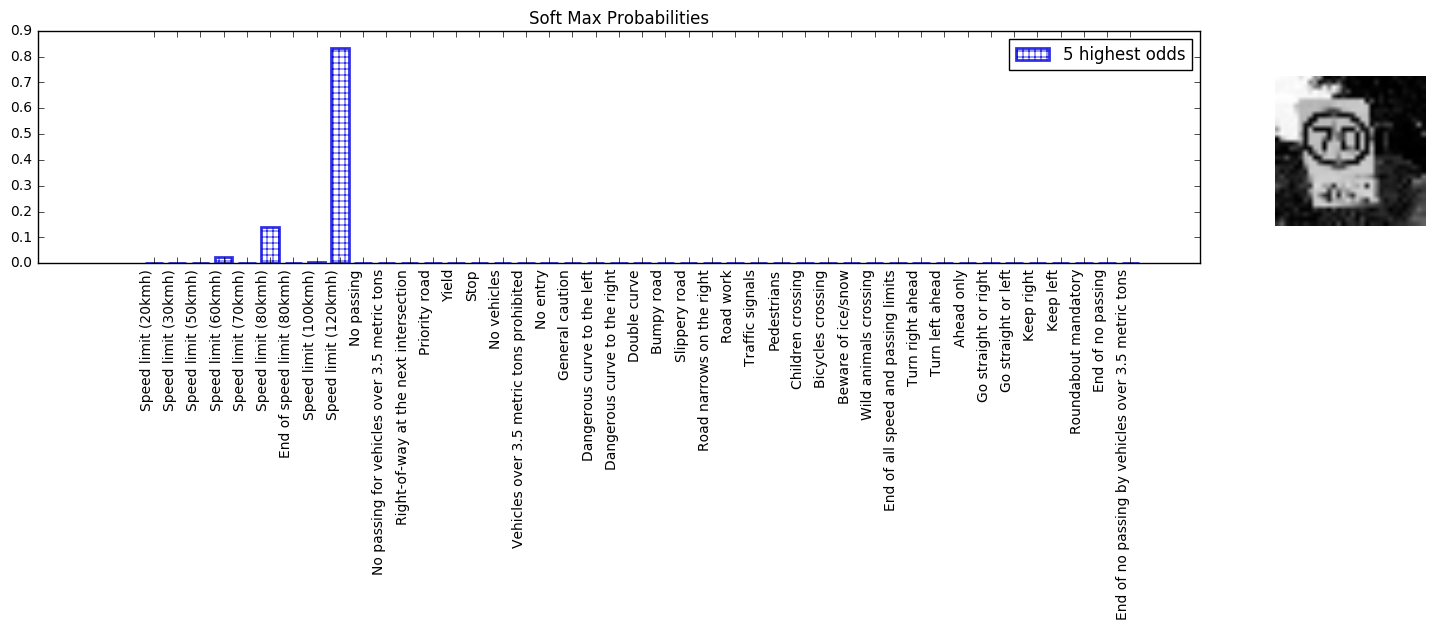

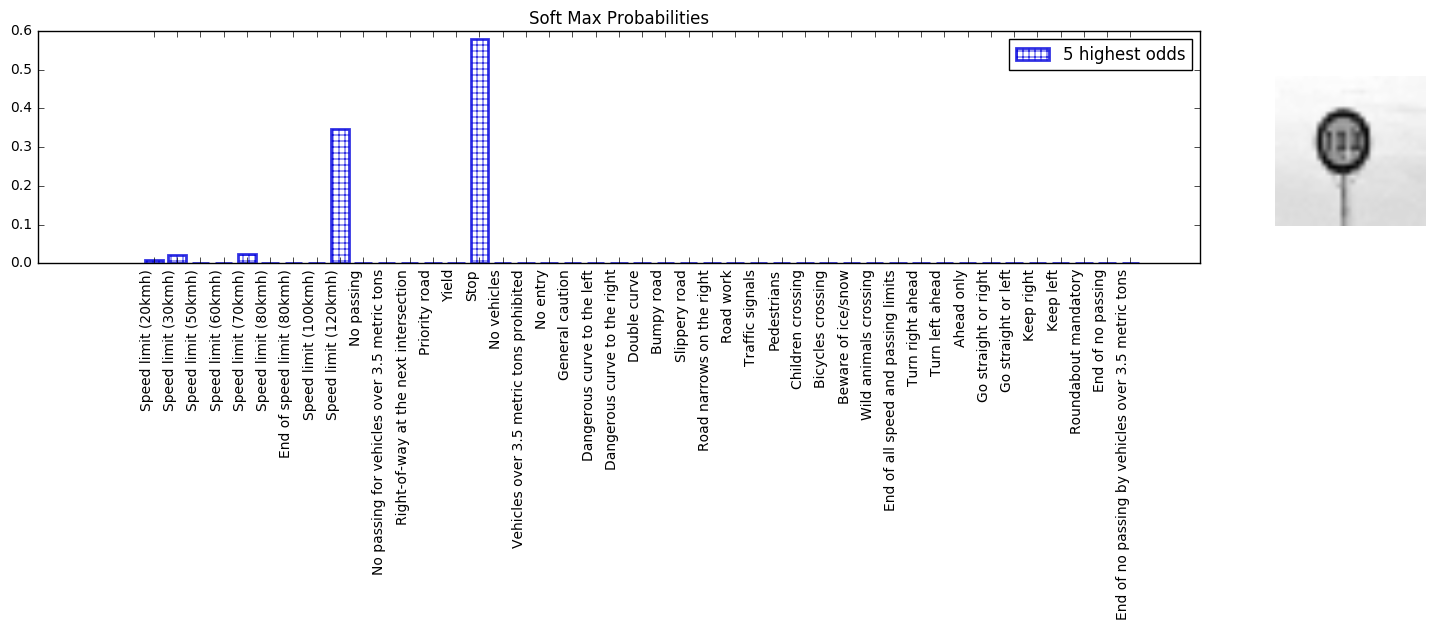

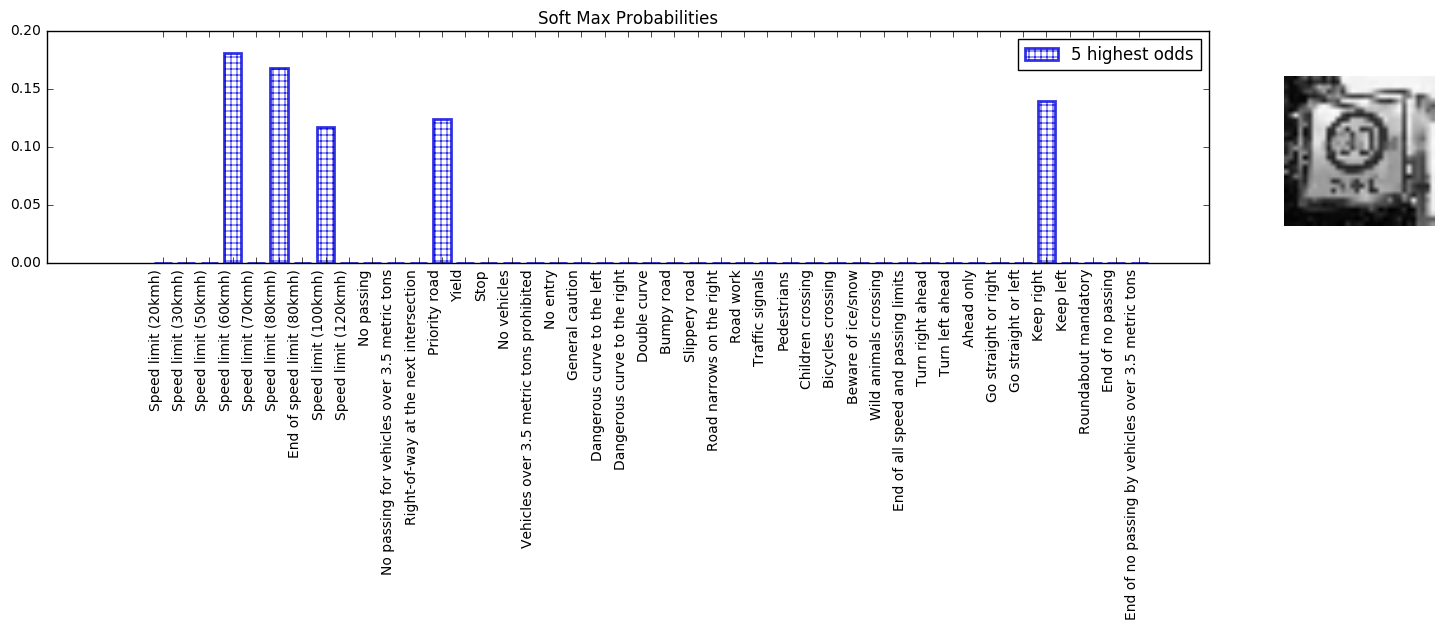

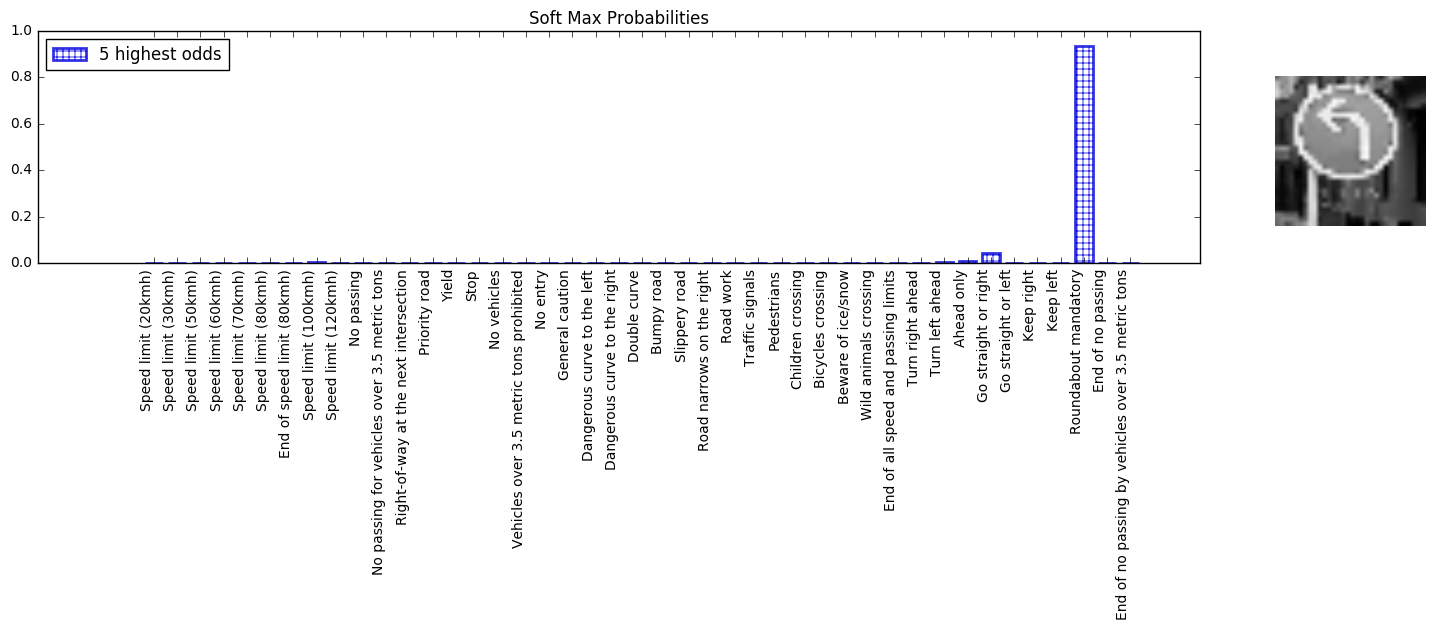

In [119]:
#Visualization of soft max probabilities.
for image  in range(0,12):
    ax_y =np.zeros((43))
    count=0
    for member in Certainty[1][image][:]:
        ax_y[member]=Certainty[0][image][count]
        count +=1
    
    ax_x= ["" for s in range(43)]
    count=0
    import csv
    with open('signnames.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
          ax_x[count]=row['SignName']
          count+=1 
    y_pos = np.arange(0,len(ax_x)*2,2)   
    plt.figure(figsize=(15,3), dpi=300)
    bar1=plt.bar(y_pos,ax_y  ,1.5,align='center', alpha=0.8,label='5 highest odds',color="white",hatch='++',
                               edgecolor='#0000DD',
                               ecolor="#0000DD",
                               linewidth=2)
    plt.title("Soft Max Probabilities")
    plt.xticks(y_pos,ax_x,ha='right',rotation=90)
    plt.legend(loc='best')
    ax=plt.axes([0.75,0.25,0.5,0.5], frameon=True)
    ax.imshow(X_newdata[image,:,:,0],cmap='gray')
    ax.axis('off')
    plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.